In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [135]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [137]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Charge_per_Tenure'] = np.where(df['tenure'] == 0, 0, df['TotalCharges'] / df['tenure'])
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
Charge_per_Tenure     0
dtype: int64

### Observation: `TotalCharges` vs. `MonthlyCharges` & `Tenure`

After creating the `Charge_per_Tenure` feature (`TotalCharges / tenure`), we specifically examined customers with a `tenure` greater than 1 month to see if `Charge_per_Tenure` provides unique information compared to `MonthlyCharges`.


In [138]:
df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Charge_per_Tenure']].head(15)

,tenure,MonthlyCharges,TotalCharges,Charge_per_Tenure
0,1,29.85,29.85,29.850000
1,34,56.95,1889.50,55.573529
2,2,53.85,108.15,54.075000
3,45,42.30,1840.75,40.905556
4,2,70.70,151.65,75.825000
5,8,99.65,820.50,102.562500
6,22,89.10,1949.40,88.609091
7,10,29.75,301.90,30.190000
8,28,104.80,3046.05,108.787500
9,62,56.15,3487.95,56.257258


In [139]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])

In [140]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charge_per_Tenure
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,64.698218
std,0.368612,24.559481,30.090047,2266.794470,30.270670
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,35.649000
50%,0.000000,29.000000,70.350000,1394.550000,70.300000
75%,0.000000,55.000000,89.850000,3786.600000,90.174158
max,1.000000,72.000000,118.750000,8684.800000,121.400000


In [141]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Charge_per_Tenure    0
dtype: int64

**Observation:**

The dataset shows a **significant class imbalance** in the `Churn` target variable, with a much higher count of non-churning customers (`No`) compared to churning customers (`Yes`). This imbalance will be an important consideration for model training and evaluation.

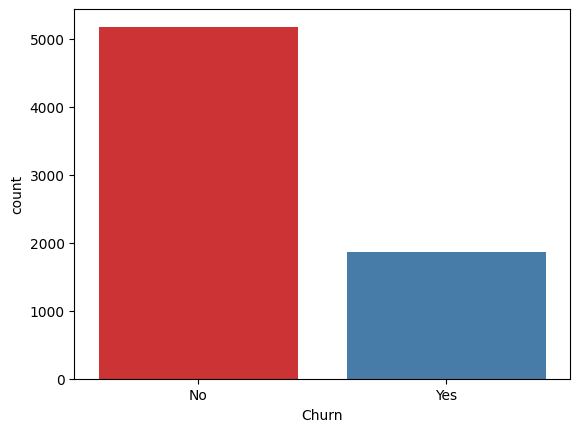

In [142]:
sns.countplot(x='Churn', hue='Churn', data=df, palette='Set1', legend=False)
plt.show()

**Observation:**

Customers with **higher `MonthlyCharges` are more likely to churn**. Non-churning customers are predominantly found at **lower `MonthlyCharges`**.

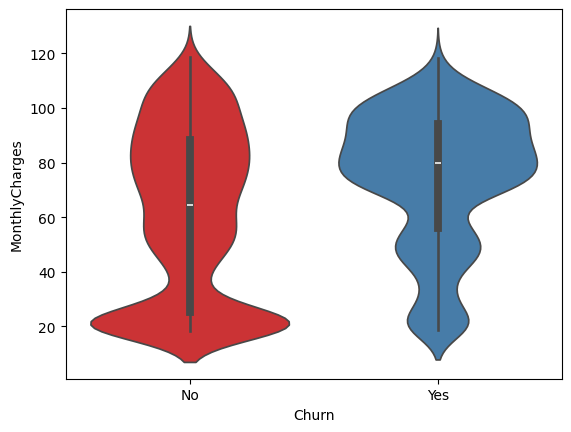

In [143]:
sns.violinplot(x='Churn', hue= 'Churn', y='MonthlyCharges', data=df, palette='Set1')
plt.show()

In [144]:
df.to_csv('../data/cleaned_df.csv', index=False)

## 3. Model Training & Evaluation

In this phase, a machine learning pipeline was constructed using `ColumnTransformer` for preprocessing (imputation, scaling for numerical features; one-hot encoding for categorical features), followed by model training and hyperparameter tuning using `RandomizedSearchCV`. The target variable 'Churn' was converted to numerical (0/1) format.

Due to the identified class imbalance, `roc_auc` was chosen as the primary scoring metric for hyperparameter tuning and model evaluation, as it provides a more robust measure of classifier performance than accuracy on imbalanced datasets.

### Models Trained:
* **Logistic Regression**
* **Random Forest Classifier**
* **XGBoost Classifier** (Gradient Boosting)

### Key Results (Cross-Validation & Test Set ROC AUC):

| Model                      | Cross-Validation ROC AUC | Test Set ROC AUC |
| :------------------------- | :----------------------- | :--------------- |
| Logistic Regression        | 0.8454                   | 0.8444           |
| Random Forest Classifier   | 0.8422                   | 0.8267           |
| **XGBoost Classifier** | **0.8509** | **0.8439** |

*(Note: ROC AUC scores might vary slightly with different random seeds or data splits.)*

### Observations:

* The **XGBoost Classifier** emerged as the top-performing model based on cross-validation ROC AUC, closely followed by Logistic Regression.
* The models demonstrate strong performance in distinguishing between churners and non-churners.
* The **impact of class imbalance** was evident in the classification reports, where models achieved higher precision/recall for the majority class ('No Churn') compared to the minority class ('Yes Churn'). This highlights the importance of focusing on metrics like ROC AUC, Precision/Recall, and F1-score for the positive class in imbalanced scenarios.

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from scipy.stats import uniform, randint
import xgboost as xgb

def train_models(dataset):
    X_COLUMN = 'Churn'

    X = dataset.drop(columns=[X_COLUMN])
    y = dataset[X_COLUMN]

    if y.dtype == 'object':
        y = y.map({'Yes': 1, 'No': 0})

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.8, random_state=123, stratify=y
    )
    print(f"\nTrain set shape: {X_train.shape}, Test set shape: {X_test.shape}")
    print(f"Train Churn ratio: {y_train.sum() / len(y_train):.2f}")
    print(f"Test Churn ratio: {y_test.sum() / len(y_test):.2f}")

    categorical_cols = X.select_dtypes(include='object').columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    if X_train[numerical_cols].isna().sum().sum() > 0:
        numerical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        print("Numerical pipeline includes SimpleImputer (median).")
    else:
        numerical_pipeline = Pipeline([
            ('scaler', StandardScaler())
        ])
        print("Numerical pipeline only includes StandardScaler (no NaNs found).")

    if X_train[categorical_cols].isna().sum().sum() > 0:
        categorical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        print("Categorical pipeline includes SimpleImputer (most_frequent) and OneHotEncoder.")
    else:
        categorical_pipeline = Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        print("Categorical pipeline only includes OneHotEncoder (no NaNs found).")

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

    models_to_train = {
        'LogisticRegression': LogisticRegression(solver='saga', max_iter=500, random_state=123),
        'RandomForestClassifier': RandomForestClassifier(random_state=123),
        'KNeighborsClassifier': KNeighborsClassifier(),
        'XGBClassifier': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)
    }

    param_grids = {
        'LogisticRegression': {
            'model__C': uniform(0.01, 10),
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'saga'],
            'model__max_iter': [200, 500, 1000]
        },
        'RandomForestClassifier': {
            'model__n_estimators': randint(50, 200),
            'model__max_depth': randint(5, 25),
            'model__min_samples_split': randint(2, 10),
            'model__min_samples_leaf': randint(1, 10)
        },
        'KNeighborsClassifier': {
            'model__n_neighbors': randint(1, 30),
            'model__weights': ['uniform', 'distance'],
            'model__p': [1, 2]
        },
        'XGBClassifier': {
            'model__n_estimators': randint(50, 300),
            'model__max_depth': randint(3, 10),
            'model__learning_rate': uniform(0.01, 0.3),
            'model__subsample': uniform(0.6, 0.4),
            'model__colsample_bytree': uniform(0.6, 0.4)
        }
    }

    results = {}

    for model_name, clf_model in models_to_train.items():
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', clf_model)
        ])

        param_dist = param_grids[model_name]

        print(f"\n--- Training {model_name} ---")
        search = RandomizedSearchCV(
            pipe,
            param_distributions=param_dist,
            n_iter=20,
            scoring='roc_auc',
            cv=5,
            random_state=123,
            n_jobs=-1
        )

        search.fit(X_train, y_train)

        best_score_auc = search.best_score_
        y_pred_proba = search.predict_proba(X_test)[:, 1]
        test_auc_score = roc_auc_score(y_test, y_pred_proba)

        print(f"Best {model_name} (Cross-Validation ROC AUC): {best_score_auc:.4f}")
        print(f"Best {model_name} params: {search.best_params_}")
        print(f"Test ROC AUC for best {model_name}: {test_auc_score:.4f}")

        y_pred_class = search.predict(X_test)
        print("Classification Report on Test Set:")
        print(classification_report(y_test, y_pred_class))

        results[model_name] = {
            'best_cv_roc_auc': best_score_auc,
            'test_roc_auc': test_auc_score,
            'best_params': search.best_params_,
            'best_estimator': search.best_estimator_
        }
    return results

In [146]:
df_cleaned = pd.read_csv('../data/cleaned_df.csv')

In [147]:
results = train_models(df_cleaned)


Train set shape: (5634, 21), Test set shape: (1409, 21)
Train Churn ratio: 0.27
Test Churn ratio: 0.27
Numerical pipeline only includes StandardScaler (no NaNs found).
Categorical pipeline only includes OneHotEncoder (no NaNs found).

--- Training LogisticRegression ---
Best LogisticRegression (Cross-Validation ROC AUC): 0.8454
Best LogisticRegression params: {'model__C': np.float64(1.4095076263038453), 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Test ROC AUC for best LogisticRegression: 0.8444
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


--- Training RandomForestClassifier ---
Best RandomForestClassifier (Cross-Validation ROC AUC): 0.8422
Bes

c:\Users\Sandriko\Desktop\Customer-Churn-Prediction-Deployment\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:54:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBClassifier (Cross-Validation ROC AUC): 0.8509
Best XGBClassifier params: {'model__colsample_bytree': np.float64(0.7754288978718498), 'model__learning_rate': np.float64(0.027903368982870505), 'model__max_depth': 3, 'model__n_estimators': 258, 'model__subsample': np.float64(0.8951981622928142)}
Test ROC AUC for best XGBClassifier: 0.8439
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [150]:
import joblib 
best_xgb_model_pipeline = results['XGBClassifier']['best_estimator']
model_save_path = '../models/best_xgb_churn_model_pipeline.joblib'
joblib.dump(best_xgb_model_pipeline, model_save_path)

['../models/best_xgb_churn_model_pipeline.joblib']